# Sentiment Analysis 

## Setting up imports and twitter API

In [4]:
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime

In [5]:
access_token = "1351055529334988804-t8ZwkYF0iEaG00ul9FaffHlJmnJUlR"
access_token_secret = "JzrPD0tgRa6Q3G8CdmqkXHXW8N9Vjk2pxowUUbhUnOSr7"
consumer_key = "FEn09Sr124drRxWxSE3Mioql1"
consumer_secret = "pXMtQyyaUgJkxfNJWg7FgQT8z6IxrF1bMsh1wFZ5E3cpojUhcX"

In [6]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

## Scraping tweets using tweepy

In [7]:
topic = "farmers protest (#farmersprotest OR #FarmersProtest OR #FarmersBill OR #FarmersBill2020 OR #FarmLaws OR #FarmersProtests OR #FarmLaws2020) lang:en"
query = tw.Cursor(api.search, q = topic).items(3000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]

In [8]:
df = pd.DataFrame.from_dict(tweets)
df.tail()

,Tweet,Timestamp
2995,RT @Sana_Jamal: Sikh farmers who have fed mill...,2021-01-26 18:19:08
2996,India's Republic Day was marked by violent unr...,2021-01-26 18:18:56
2997,RT @VNarayanasami: In support of #Farmers Prot...,2021-01-26 18:18:45
2998,RT @SimranRoohi: Did you know this is currentl...,2021-01-26 18:18:42
2999,RT @hate_stopper: @TimesNow @Shehzad_Ind Times...,2021-01-26 18:18:07


## Cleaning the tweets

In [9]:
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['rt', 'th']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sundarraghavanl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sundarraghavanl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
import re

def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet.lower()
    processed_tweet = " ".join(re.sub('@[^\s]+', '', processed_tweet).split()) #removing usernames -> recognising an @ followed by characters that aren't \s ie they arent white spaces
    processed_tweet = " ".join(re.sub(r'#\w+ ?', '', processed_tweet).split()) #removing hashtags 
    processed_tweet = " ".join(re.sub(r'http\S+', '', processed_tweet).split()) #removing URLs
    processed_tweet = " ".join(re.sub('[^-9A-Za-z ]', '', processed_tweet).split()) #removing punctuation
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words) #removing standard nltk stopwords
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords) #removing custom stopwords
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split()) 
    processed_tweet = " ".join(re.sub('\s+', ' ', processed_tweet).split()) #removing redundant white spaces
    return(processed_tweet)
    

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Processed Tweet
0,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:56:19,farmer seen taking tent chilla border followin...
1,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:56:14,farmer seen taking tent chilla border followin...
2,RT @dna: #Watch | #DelhiPolice personnel force...,2021-01-27 12:55:59,personnel forced jump -foot wall escape farmer
3,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:55:55,farmer seen taking tent chilla border followin...
4,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:55:42,farmer seen taking tent chilla border followin...


## Finding sentiment and assigning labels

In [12]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [46]:
df.head()

,Tweet,Timestamp,Processed Tweet,polarity,subjectivity,label
0,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:56:19,farmer seen taking tent chilla border followin...,0.0,0.1,0.0
1,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:56:14,farmer seen taking tent chilla border followin...,0.0,0.1,0.0
2,RT @dna: #Watch | #DelhiPolice personnel force...,2021-01-27 12:55:59,personnel forced jump -foot wall escape farmer,-0.3,0.2,-1.0
3,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:55:55,farmer seen taking tent chilla border followin...,0.0,0.1,0.0
4,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:55:42,farmer seen taking tent chilla border followin...,0.0,0.1,0.0


In [14]:
labels = np.empty(len(df))

for i in range(0,len(df)):
    if df.polarity[i] > 0:
        labels[i] = 1 
    elif df.polarity[i] < 0:
        labels[i] = -1
    elif df.polarity[i] == 0:
        labels[i] = 0

In [15]:
labels

array([ 0.,  0., -1., ...,  0.,  0., -1.])

In [16]:
df['label'] = labels
df.head()

,Tweet,Timestamp,Processed Tweet,polarity,subjectivity,label
0,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:56:19,farmer seen taking tent chilla border followin...,0.0,0.1,0.0
1,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:56:14,farmer seen taking tent chilla border followin...,0.0,0.1,0.0
2,RT @dna: #Watch | #DelhiPolice personnel force...,2021-01-27 12:55:59,personnel forced jump -foot wall escape farmer,-0.3,0.2,-1.0
3,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:55:55,farmer seen taking tent chilla border followin...,0.0,0.1,0.0
4,RT @ANINewsUP: #WATCH: Some farmers seen takin...,2021-01-27 12:55:42,farmer seen taking tent chilla border followin...,0.0,0.1,0.0


## EDA

In [17]:
df.describe() 

,polarity,subjectivity,label
count,3000.000000,3000.000000,3000.00000
mean,0.009036,0.339997,0.13500
std,0.198289,0.269384,0.60572
min,-1.000000,0.000000,-1.00000
25%,0.000000,0.050000,0.00000
50%,0.000000,0.400000,0.00000
75%,0.068182,0.500000,1.00000
max,0.900000,1.000000,1.00000


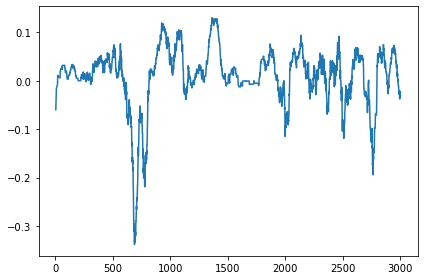

In [18]:
plt.plot(df.polarity.rolling(40, min_periods=5).mean())
plt.tight_layout()
plt.show()

/Users/sundarraghavanl/opt/anaconda2/envs/new_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


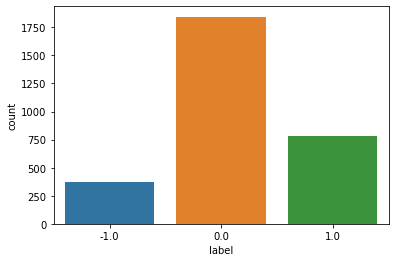

In [19]:
import seaborn as sns
sns.countplot(df['label'])
plt.show()

## Building a classifier 

In [20]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

### Naive Bayes classifier

In [35]:
pipeline_bayes = Pipeline([
    ('bow',CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [36]:
msg_train, msg_test, label_train, label_test = train_test_split(df['Processed Tweet'], df['label'], test_size = 0.2)
pipeline_bayes.fit(msg_train,label_train)
predictions_bayes = pipeline_bayes.predict(msg_test)
print(classification_report(predictions_bayes,label_test))
print(confusion_matrix(predictions_bayes,label_test))
print(accuracy_score(predictions_bayes,label_test))


              precision    recall  f1-score   support

        -1.0       0.85      0.94      0.89        67
         0.0       0.97      0.95      0.96       380
         1.0       0.93      0.93      0.93       153

    accuracy                           0.94       600
   macro avg       0.92      0.94      0.93       600
weighted avg       0.94      0.94      0.94       600

[[ 63   4   0]
 [  9 360  11]
 [  2   8 143]]
0.9433333333333334


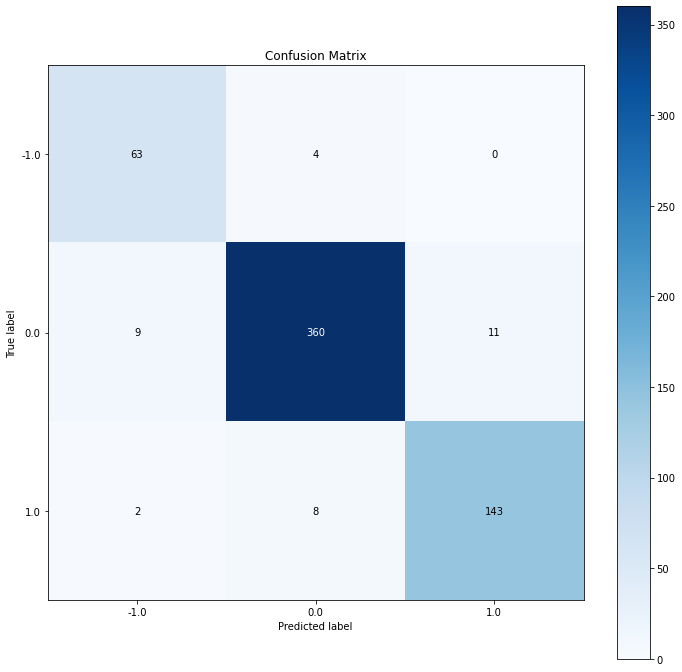

In [37]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(predictions_bayes, label_test, figsize = (12,12))
plt.show()

In [39]:
print(accuracy_score(predictions_bayes,label_test))

0.9433333333333334


### Logistic regression classifier

In [25]:
from sklearn.linear_model import LogisticRegression

pipeline_logreg = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='liblinear', multi_class='auto')),
        ])

In [26]:
msg_train, msg_test, label_train, label_test = train_test_split(df['Processed Tweet'], df['label'], test_size = 0.2)
pipeline_logreg.fit(msg_train,label_train)
log_predictions = pipeline_logreg.predict(msg_test)
print(classification_report(log_predictions,label_test))
print(confusion_matrix(log_predictions,label_test))
print(accuracy_score(log_predictions,label_test))

              precision    recall  f1-score   support

        -1.0       0.88      0.99      0.93        68
         0.0       1.00      0.93      0.96       380
         1.0       0.88      0.99      0.93       152

    accuracy                           0.95       600
   macro avg       0.92      0.97      0.94       600
weighted avg       0.95      0.95      0.95       600

[[ 67   0   1]
 [  8 353  19]
 [  1   1 150]]
0.95


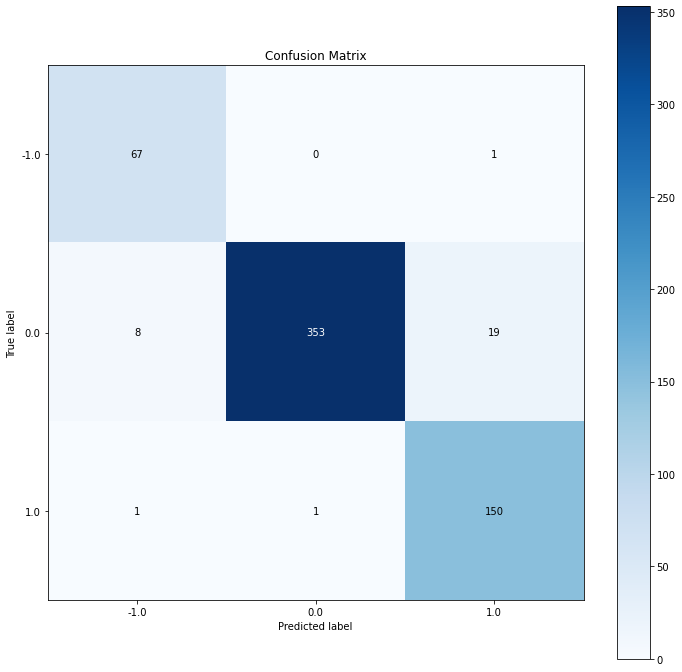

In [27]:
skplt.metrics.plot_confusion_matrix(log_predictions, label_test, figsize = (12,12))
plt.show()

## Most used words

### Positive

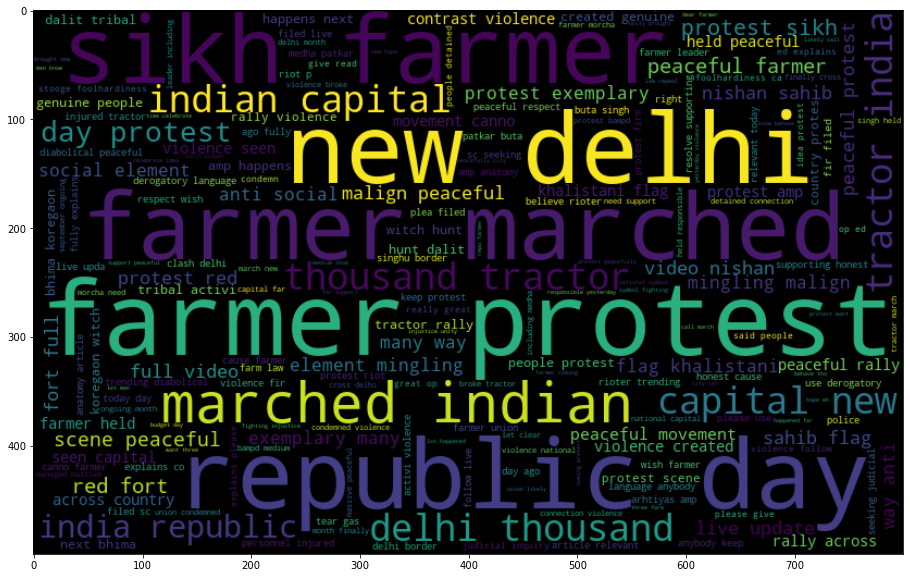

In [43]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df[df['label'] == 1]['Processed Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
img = plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

### Negative

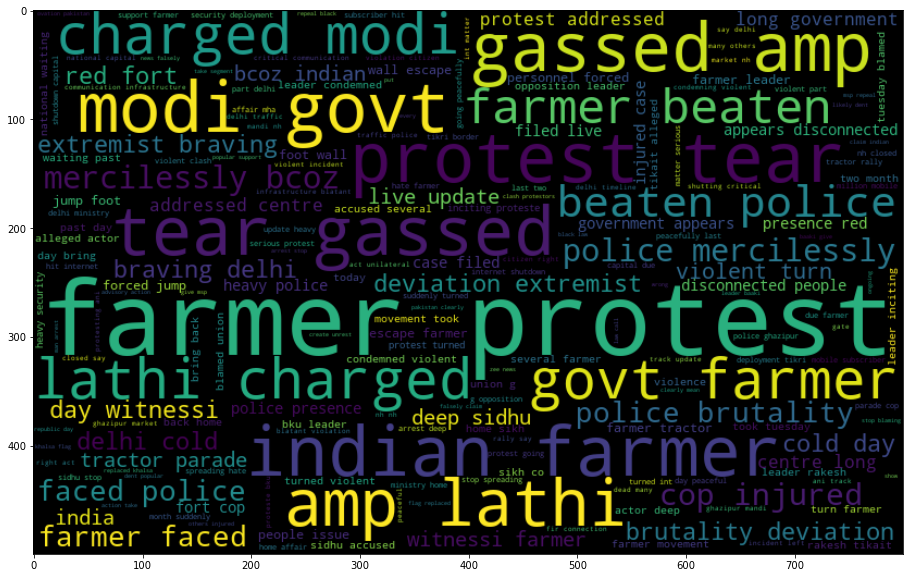

In [42]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df[df['label'] == -1]['Processed Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
img = plt.imshow(wordcloud, interpolation="bilinear")
plt.show()